# **이변량분석 : 범주 vs 숫자**

## **1.환경준비**

* 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.
> 타이타닉 생존자

|	변수	|	설명	|	값 설명	|
|----|----|----|
|	**survived**	|	생존여부	|	0 - 사망, 1- 생존	|
|	**Pclass**	|	Ticket class	|	1 = 1st, 2 = 2nd, 3 = 3rd	|
|	**Sex**	|	성별	|		|
|	**Age**	|	Age in years	|		|
|	**Sibsp**	|	# of siblings / spouses aboard the Titanic	|		|
|	**Parch**	|	# of parents / children aboard the Titanic	|		|
|	**Ticket**	|	Ticket number	|		|
|	**Fare**	|	Passenger fare	|		|
|	**Cabin**	|	Cabin number	|		|
|	**Embarked**	|	Port of Embarkation	|	C = Cherbourg, Q = Queenstown, S = Southampton	|


In [2]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.0.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


범주별 숫자를 비교할 때 사용되는 방식은 **범주별 평균 비교** 입니다.  


## **2.시각화**
titanic data에서 Age를 Y로 두고 비교해 봅시다.

### **(1) 평균 비교 : barplot**

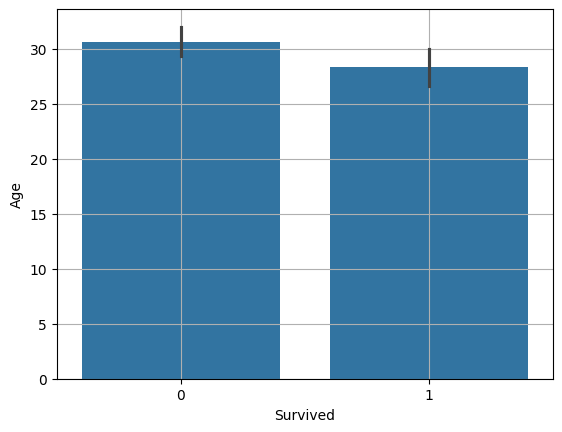

In [3]:
sns.barplot(x="Survived", y="Age", data=titanic)
plt.grid()
plt.show()

In [4]:
titanic.loc[:10, ['Survived','Age']]

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0
5,0,NaN
6,0,54.0
7,0,2.0
8,1,27.0
9,1,14.0


위 두 범주간에 평균에 차이가 있나요?

막대의 상단에 짧은 수직선이 하나씩 표시되어 있습니다. 이 수직선은 '오차 막대(Error Bar)'로, 주로 평균값의 변동성을 표현하는데 사용됩니다.

평균에 차이가 있어 보이지만, 신뢰구간이 겹치므로 통계적으로 유의미한 차이라고 보기는 어렵습니다.

### **(2) (추가) boxplot**

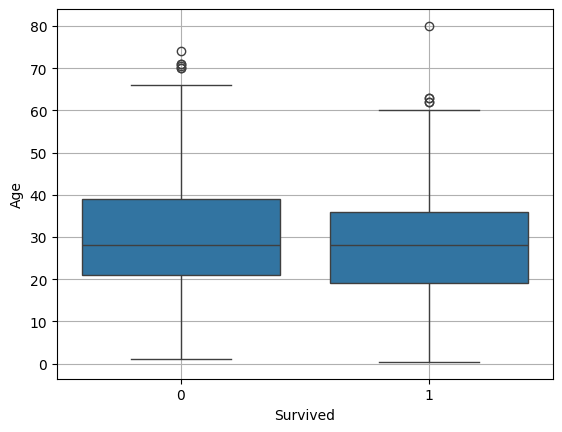

In [5]:
sns.boxplot(x='Survived', y = 'Age', data = titanic)
plt.grid()
plt.show()

세 집단

<Axes: xlabel='Pclass', ylabel='Age'>

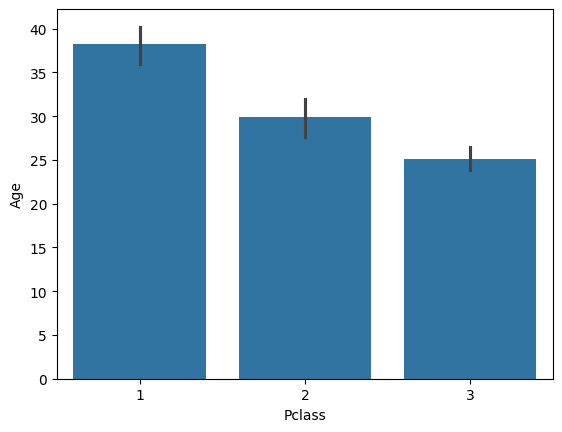

In [6]:
sns.barplot(x='Pclass', y='Age', data=titanic)

## **3.수치화**

### **(1) t-test**

두 집단의 평균을 비교합니다.
* 예제는 Two sample T-test와 양측검정만 다룹니다.
* 우리는 X --> Y의 관계에서 ,두 변수간에 관련이(차이가) 있는지, 없는지를 확인하는 것이 제일 중요하기 때문입니다.
* 주의사항 : 데이터에 NaN이 있으면 계산이 안됩니다. .notnull() 등으로 NaN을 제외한 데이터를 사용해야 합니다.
* t 통계량
    * 두 평균의 차이를 표준오차로 나눈 값.
    * 기본적으로는 두 평균의 차이로 이해해도 좋습니다.
    * 우리의 가설(대립가설)은 차이가 있다는 것이므로, t 값이 크던지 작던지 하기를 바랍니다.
    * 보통, t 값이 -2보다 작거나, 2보다 크면 차이가 있다고 봅니다.

* 이번엔 타이타닉 데이터로 시도해 봅시다.
    * 생존여부 --> Age : 생존여부 별로 나이에 차이가 있을것이다.


#### **1) 데이터 준비**

In [7]:
# 먼저 NaN이 있는지 확인해 봅시다.
titanic.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
# NaN 행 제외
temp = titanic.loc[titanic['Age'].notnull()]

In [9]:
# 두 그룹으로 데이터 저장
died = temp.loc[temp['Survived']==0, 'Age']
survived = temp.loc[temp['Survived']==1, 'Age']

#### **2) t-test**

In [10]:
spst.ttest_ind(died, survived)

TtestResult(statistic=2.06668694625381, pvalue=0.03912465401348249, df=712.0)

In [11]:
spst.ttest_ind(survived, died)

TtestResult(statistic=-2.06668694625381, pvalue=0.03912465401348249, df=712.0)

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

* [문1] 성별에 따라 운임에 차이가 있을 것이다.

In [12]:
male = titanic.loc[titanic['Sex'] == 'male', 'Fare']
female = titanic.loc[titanic['Sex'] == 'female', 'Fare']

<Axes: xlabel='Sex', ylabel='Fare'>

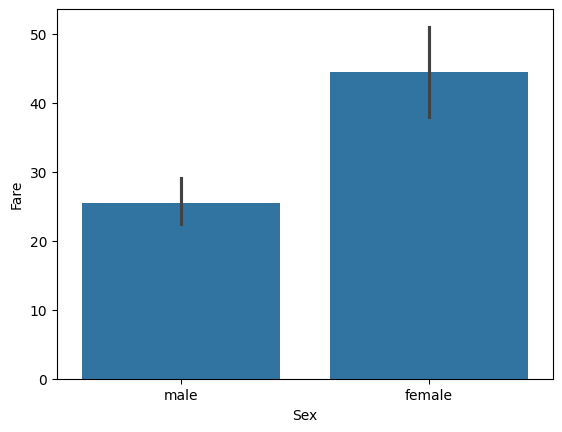

In [13]:
sns.barplot(x = 'Sex', y = 'Fare', data = titanic)

In [14]:
spst.ttest_ind(male, female)

TtestResult(statistic=-5.529140269385719, pvalue=4.2308678700429995e-08, df=889.0)

* [문2] 생존여부에 따라 운임에 차이가 있을 것이다.

In [15]:
temp = titanic.loc[titanic['Fare'].notnull()]
died = temp.loc[temp['Survived']==0, 'Fare']
survived = temp.loc[temp['Survived']==1, 'Fare']

<Axes: xlabel='Survived', ylabel='Fare'>

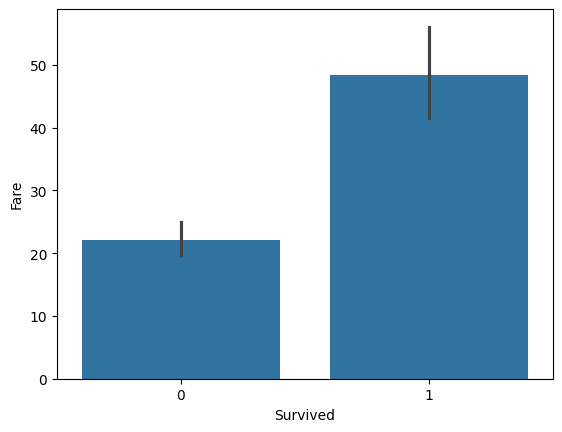

In [16]:
sns.barplot(x = 'Survived', y = 'Fare', data = titanic)

In [17]:
spst.ttest_ind(died, survived)

TtestResult(statistic=-7.939191660871055, pvalue=6.120189341924198e-15, df=889.0)

### **(2) anova**


* 분산 분석 **AN**alysis **O**f **VA**riance
* 여러 집단 간에 차이는 어떻게 비교할 수 있을까요?
* 여기서 기준은 전체 평균 입니다.
* 𝐹 통계량 =
    * (집단 간 분산)/(집단 내 분산) = (전체 평균 − 각 집단 평균)/(각 집단의 평균 − 개별 값)
    * 값이 대략 2~3 이상이면 차이가 있다고 판단합니다.

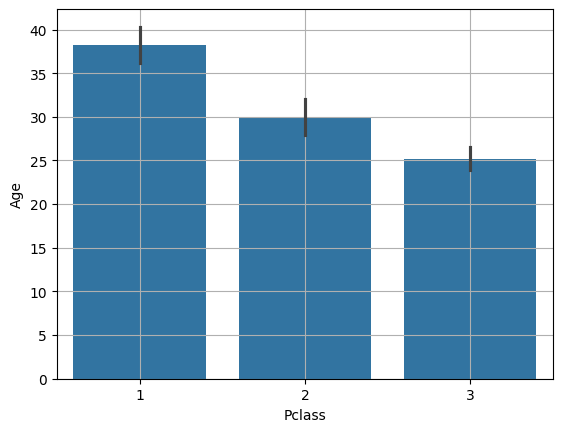

In [18]:
# Pclass(3 범주) --> Age
sns.barplot(x="Pclass", y="Age", data=titanic)
plt.grid()
plt.show()

#### **1) 데이터 준비**

In [19]:
# 1) 분산 분석을 위한 데이터 만들기
# NaN 행 제외
temp = titanic.loc[titanic['Age'].notnull()]
# 그룹별 저장
P_1 = temp.loc[temp.Pclass == 1, 'Age']
P_2 = temp.loc[temp.Pclass == 2, 'Age']
P_3 = temp.loc[temp.Pclass == 3, 'Age']

#### **2) anova**

In [20]:
spst.f_oneway(P_1, P_2, P_3)

F_onewayResult(statistic=57.443484340676214, pvalue=7.487984171959904e-24)

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

* [문1] 승선지역(Embarked)별로 운임에 차이가 있을 것이다.
    * 시각화와 수치화로 확인해 봅시다.

In [21]:
titanic['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [22]:
S = titanic.loc[titanic['Embarked'] == "S", 'Fare']
C = titanic.loc[titanic['Embarked'] == "C", 'Fare']
Q = titanic.loc[titanic['Embarked'] == "Q", 'Fare']

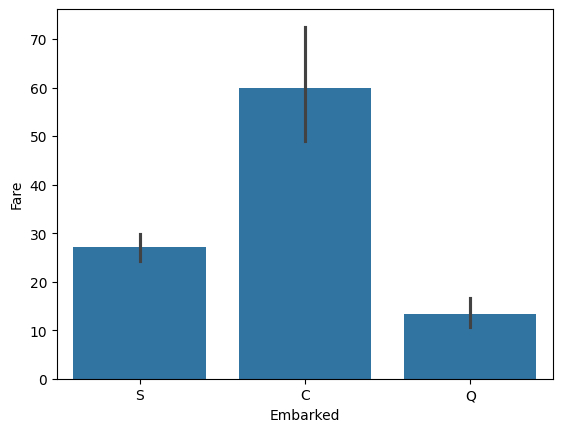

F_onewayResult(statistic=38.14030520011266, pvalue=1.2896450252631794e-16)


In [23]:
sns.barplot(x = 'Embarked', y = 'Fare', data = titanic)
plt.show()

print(spst.f_oneway(S, C, Q))

그룹 별 평균 운임 차이가 있다는 것을 알 수 있습니다.

* [문2] 객실등급(Pclass)별로 운임에 차이가 있을 것이다.
    * 시각화와 수치화로 확인해 봅시다.

In [24]:
titanic['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


In [25]:
P3 = titanic.loc[titanic['Pclass'] == 3, 'Fare']
P2 = titanic.loc[titanic['Pclass'] == 2, 'Fare']
P1 = titanic.loc[titanic['Pclass'] == 1, 'Fare']

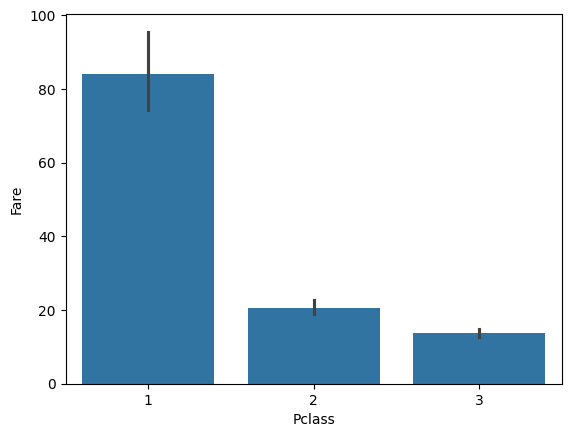

F_onewayResult(statistic=242.34415651744814, pvalue=1.0313763209141171e-84)


In [26]:
sns.barplot(x = 'Pclass', y = 'Fare', data = titanic)
plt.show()

print(spst.f_oneway(P1, P2, P3))

## **4.복습문제**

air quality 데이터셋으로 다음 문제를 풀어 봅시다.

* 라이브러리 불러오기

In [27]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

* 데이터불러오기

In [28]:
# 뉴욕시 공기 오염도 데이터
air = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/air2.csv')
air['Date'] = pd.to_datetime(air['Date'])
air['Month'] = air.Date.dt.month
air['Weekday'] = air.Date.dt.weekday
air['Weekend'] = np.where(air['Weekday'] >=5, 1, 0)
air.head()

,Ozone,Solar.R,Wind,Temp,Date,Month,Weekday,Weekend
0,41,190.0,7.4,67,1973-05-01,5,1,0
1,36,118.0,8.0,72,1973-05-02,5,2,0
2,12,149.0,12.6,74,1973-05-03,5,3,0
3,18,313.0,11.5,62,1973-05-04,5,4,0
4,19,NaN,14.3,56,1973-05-05,5,5,1


* 1) 주말여부(Weekend) --> 오존농도(Ozone)와의 관계를 시각화하고, 가설검정을 수행해 봅시다.

<Axes: xlabel='Weekend', ylabel='Ozone'>

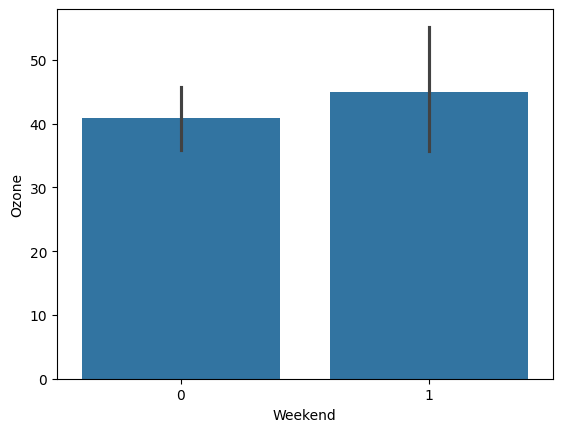

In [29]:
sns.barplot(x = 'Weekend', y = 'Ozone', data = air)

In [30]:
w0 = air.loc[air['Weekend'] == 0, 'Ozone']
w1 = air.loc[air['Weekend'] == 1, 'Ozone']
spst.ttest_ind(w0, w1)

TtestResult(statistic=-0.7671489829911908, pvalue=0.4441907648291733, df=151.0)

* 2) 요일(Weekday) --> 오존농도(Ozone)와의 관계를 시각화하고, 가설검정을 수행해 봅시다.

<Axes: xlabel='Weekday', ylabel='Ozone'>

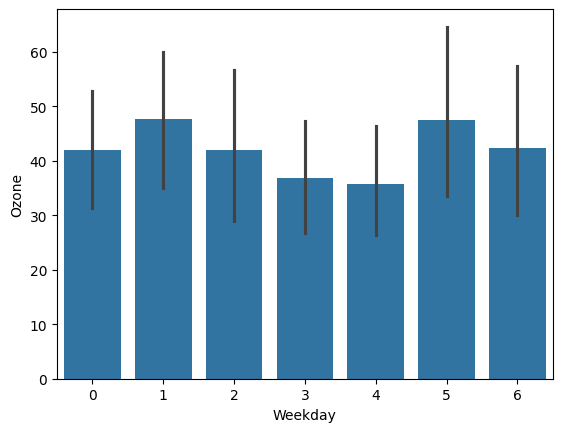

In [31]:
sns.barplot(x = 'Weekday', y = 'Ozone', data = air)

In [32]:
w0 = air.loc[air['Weekday'] == 0, 'Ozone']
w1 = air.loc[air['Weekday'] == 1, 'Ozone']
w2 = air.loc[air['Weekday'] == 2, 'Ozone']
w3 = air.loc[air['Weekday'] == 3, 'Ozone']
w4 = air.loc[air['Weekday'] == 4, 'Ozone']
w5 = air.loc[air['Weekday'] == 5, 'Ozone']
w6 = air.loc[air['Weekday'] == 6, 'Ozone']

spst.f_oneway(w0, w1, w2, w3, w4, w5, w6)

F_onewayResult(statistic=0.5098923426664418, pvalue=0.8001433644111904)

In [33]:
p = []
for i in range(7):
    t=air.loc[air['Weekday']==i, 'Ozone']
    p.append(t)

spst.f_oneway(*p) # asterisk(*)는 배열 변수의 값을 하나씩 unpacking 해준다.

F_onewayResult(statistic=0.5098923426664418, pvalue=0.8001433644111904)

* 3) 월(Month) --> 오존농도(Ozone)와의 관계를 시각화하고, 가설검정을 수행해 봅시다.

<Axes: xlabel='Month', ylabel='Ozone'>

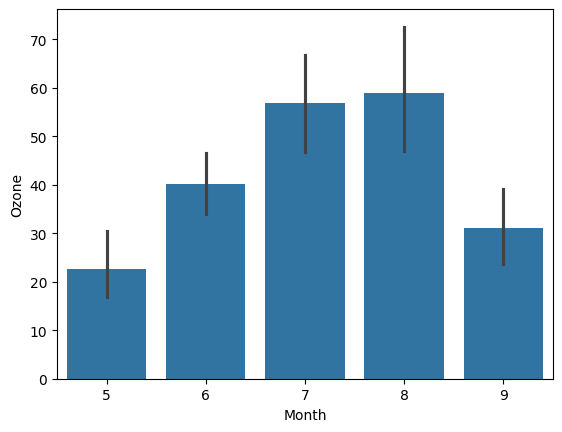

In [34]:
sns.barplot(x = 'Month', y = 'Ozone', data = air)

In [35]:
m0 = air.loc[air['Month'] == 5, 'Ozone']
m1 = air.loc[air['Month'] == 6, 'Ozone']
m2 = air.loc[air['Month'] == 7, 'Ozone']
m3 = air.loc[air['Month'] == 8, 'Ozone']
m4 = air.loc[air['Month'] == 9, 'Ozone']

spst.f_oneway(m0, m1, m2, m3, m4)

F_onewayResult(statistic=10.702965130677123, pvalue=1.2027079954529325e-07)

In [36]:
p = []

data = air
var = 'Month'
target = 'Ozone'

groups = data[var].unique()
for i in groups:
    t=data.loc[data[var]==i, target]
    p.append(t)

spst.f_oneway(*p)

F_onewayResult(statistic=10.702965130677123, pvalue=1.2027079954529325e-07)